In [2]:
import numpy as np
import matplotlib.pyplot as plt

<>:20: SyntaxWarning: invalid escape sequence '\o'
<>:21: SyntaxWarning: invalid escape sequence '\o'
<>:20: SyntaxWarning: invalid escape sequence '\o'
<>:21: SyntaxWarning: invalid escape sequence '\o'
/var/folders/_0/jpz85s0964z48by8xyv_gccw0000gn/T/ipykernel_2182/4117062375.py:20: SyntaxWarning: invalid escape sequence '\o'
  ax[0].set_xlabel('$ \omega$ / rad / s ')
/var/folders/_0/jpz85s0964z48by8xyv_gccw0000gn/T/ipykernel_2182/4117062375.py:21: SyntaxWarning: invalid escape sequence '\o'
  ax[1].set_xlabel(' $ \omega$ / rad / s ')


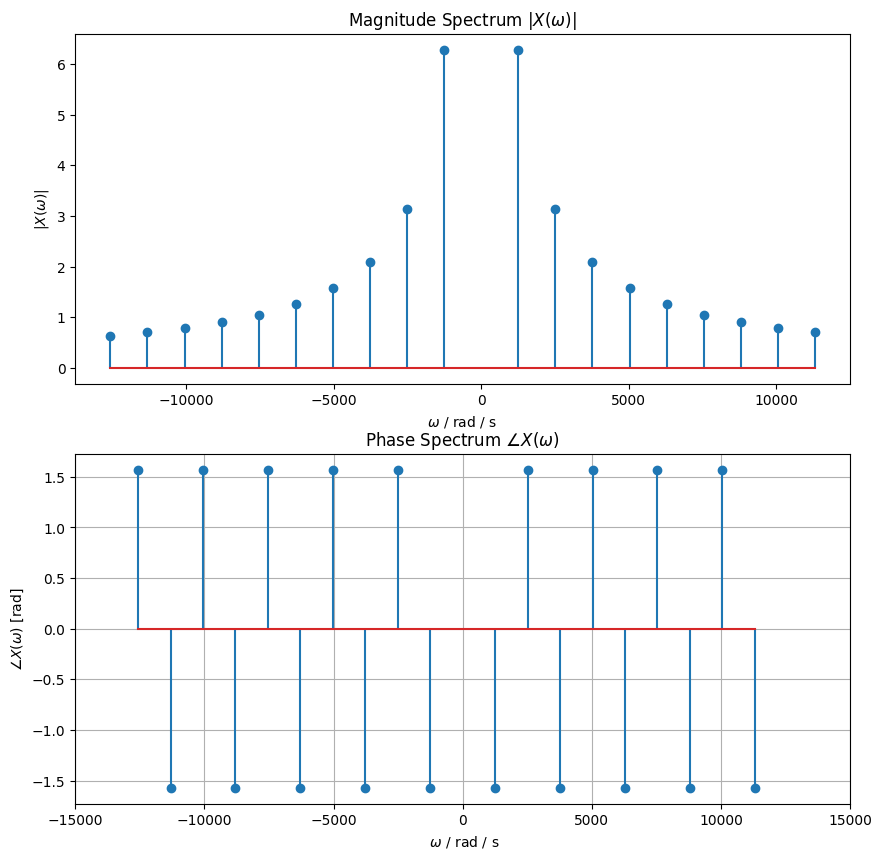

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#coefficient vector with odd numbers from -15 ms to 15ms
n = np.arange(-10,10,1) #s
n = n[n != 0]
t0 = 0.005 #s
f0 = 1 / t0
w0 = 2*np.pi*f0 #fundamental anguar freq
w0_max = 15000
wn = n*w0
c_n = np.zeros_like(n, dtype=complex)
nonzero = n != 0
c_n[nonzero] = 1j * ((-1) ** np.floor(np.abs(n[nonzero]))) / np.abs(n[nonzero])
Xn = 2 * np.pi * c_n

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].stem(wn,np.abs(Xn))
ax[1].stem(wn, np.angle(Xn))
ax[0].set_xlabel('$ \omega$ / rad / s ')
ax[1].set_xlabel(' $ \omega$ / rad / s ')
ax[0].set_ylabel(r'$|X(\omega)|$')
ax[1].set_ylabel(r'$\angle X(\omega)$ [rad]')
ax[0].set_title(r'Magnitude Spectrum $|X(\omega)|$')
ax[1].set_title(r'Phase Spectrum $\angle X(\omega)$')
ax[1].grid()
ax[1].set_xlim((-15000,15000))

plt.show()

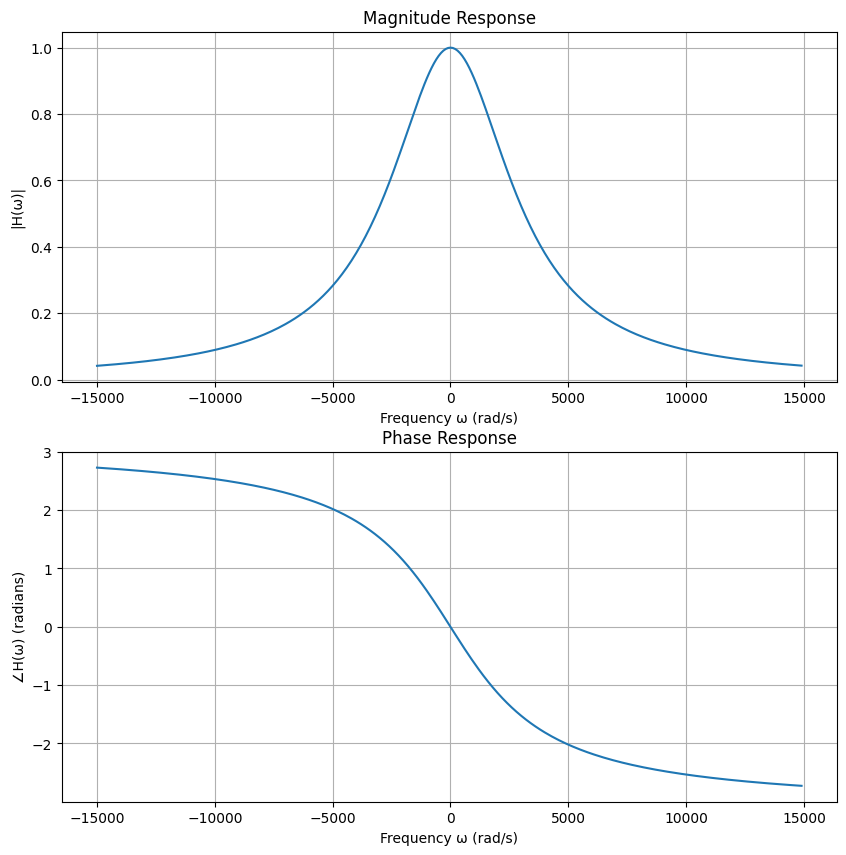

In [12]:
#TASK 2
import numpy as np
import matplotlib.pyplot as plt

dw = 100 #s, men osäker om detta!!!!!!!!!
w = np.arange(-15e3, 15e3, dw)
alpha = 1000 * np.pi

frequency_response = (alpha ** 2) / ((alpha + (1j * w)) ** 2)

# Plot magnitude and phase
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Magnitude plot
ax1.plot(w, np.abs(frequency_response))
ax1.set_xlabel('Frequency ω (rad/s)')
ax1.set_ylabel('|H(ω)|')
ax1.set_title('Magnitude Response')
ax1.grid(True)

# Phase plot
ax2.plot(w, np.angle(frequency_response))
ax2.set_xlabel('Frequency ω (rad/s)')
ax2.set_ylabel('∠H(ω) (radians)')
ax2.set_title('Phase Response')
ax2.grid(True)

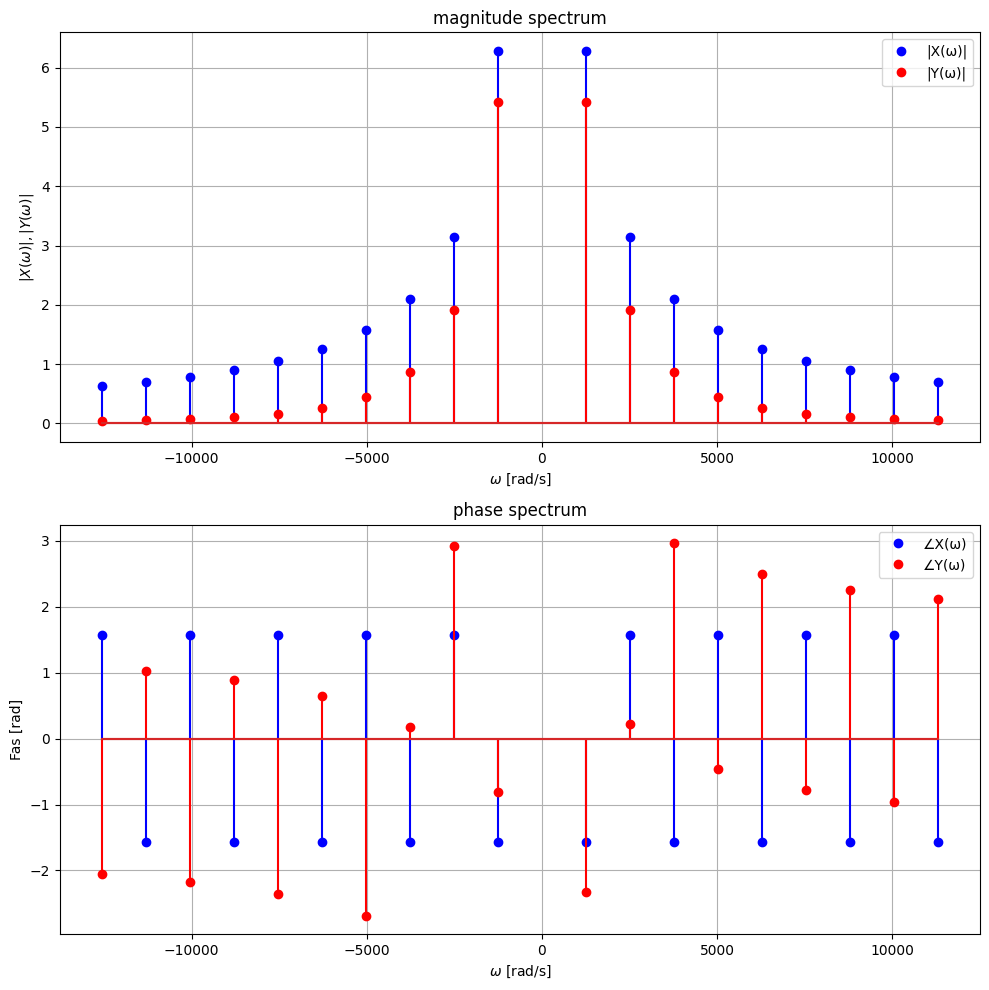

In [26]:
n = np.arange(-10,10,1) #s
n = n[n != 0]
t0 = 0.005 #s
f0 = 1 / t0
w0 = 2*np.pi*f0 #fundamental anguar freq
w0_max = 15000
wn = n*w0
dw = 100 #s
w = np.arange(-15e3, 15e3, dw)
c_n = np.zeros_like(n, dtype=complex)
nonzero = n != 0
c_n[nonzero] = 1j * ((-1) ** np.abs(n[nonzero])) / np.abs(n[nonzero])
Xn = 2 * np.pi * c_n
alpha = 1000 * np.pi
frequency_response = (alpha ** 2) / ((alpha + (1j * wn)) ** 2)
Yn = frequency_response * Xn

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10)) 
# Magnitude plot 
stem1 = ax1.stem(wn, np.abs(Xn), 'b') 
stem2 = ax1.stem(wn, np.abs(Yn), 'r') 

stem1[0].set_label('|X(ω)|') 
stem2[0].set_label('|Y(ω)|') 
ax1.set_title('magnitude spectrum') 
ax1.set_xlabel(r'$\omega$ [rad/s]') 
ax1.set_ylabel(r'$|X(\omega)|, |Y(\omega)|$') 
ax1.legend() 
ax1.grid(True) 

stem3 = ax2.stem(wn, np.angle(Xn), 'b') 
stem4 = ax2.stem(wn, np.angle(Yn), 'r') 
stem3[0].set_label('∠X(ω)') 
stem4[0].set_label('∠Y(ω)') 
ax2.set_title('phase spectrum') 
ax2.set_xlabel(r'$\omega$ [rad/s]') 
ax2.set_ylabel(r'Fas [rad]') 
ax2.legend() 
ax2.grid(True) 
plt.tight_layout() 
plt.show()



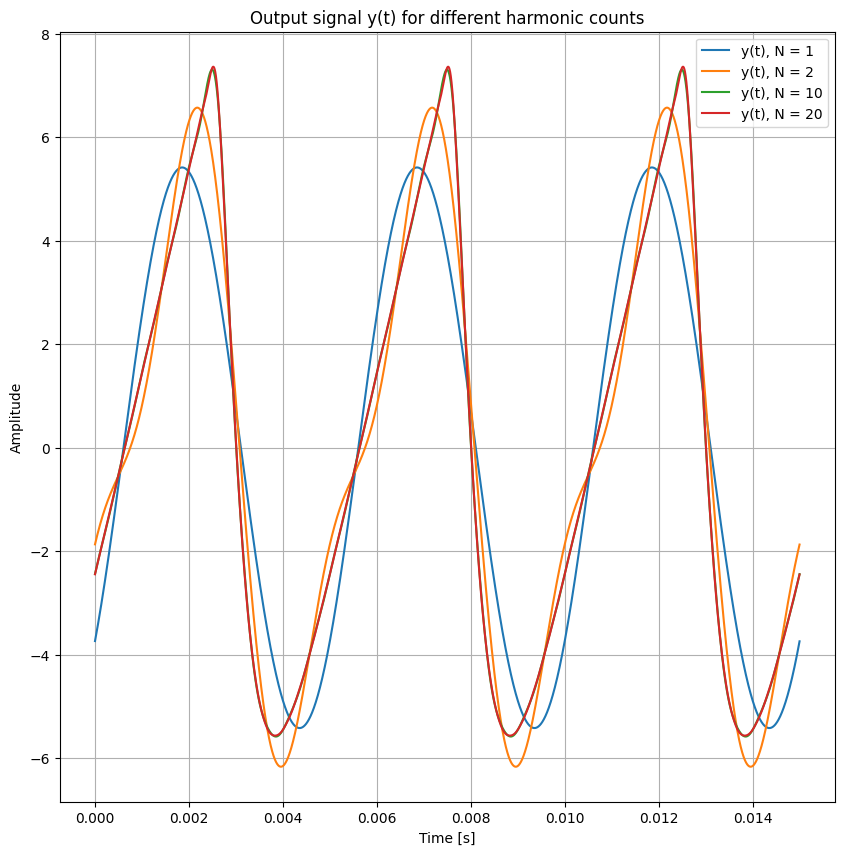

In [2]:
import numpy as np
import matplotlib.pyplot as plt
n = np.arange(1, 21, 1)
n = n[n != 0]
t0 = 0.005 #s
f0 = 1 / t0
w0 = 2*np.pi*f0 #fundamental anguar freq
w0_max = 15000
wn = n*w0
dw = 100 #s
w = np.arange(-15e3, 15e3, dw)
c_n = np.zeros_like(n, dtype=complex)
nonzero = n != 0
c_n[nonzero] = 1j * ((-1) ** np.floor(np.abs(n[nonzero]))) / np.abs(n[nonzero])
Xn = 2 * np.pi * c_n
alpha = 1000 * np.pi
frequency_response = (alpha ** 2) / ((alpha + (1j * wn)) ** 2)
Yn = frequency_response * Xn
dt = 1e-6
t = np.arange(0,0.015, dt)

exp = np.exp(1j * np.outer(t, wn))

y_t = (Yn@exp.T) / (2 * np.pi)

N_vals = [1,2,10,20] #(1,2,10,20)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, N in enumerate(N_vals):
    y_t_N = Yn[:N] @ exp[:, :N].T
    ax.plot(t, np.real(y_t_N), label=f"y(t), N = {N}")

ax.set_title('Output signal y(t) for different harmonic counts')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.legend()
ax.grid(True)
plt.show()